# N-body Simulation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
%matplotlib inline
import time
import mpld3
mpld3.enable_notebook()
t1 = time.time()
##################### initialisation ###########################
G = 1.
m = np.array([1.,1.,5.])#,2.])
t_0 = 0.
t_fin =300.
h =0.01
r = np.array([[1.,1.,0.],[-1.,-1.,0.],[0.,0.,0.]])
vel = np.array([[-0.5,0.,0.],[0.5,0.,0.],[0.,0.,0.]])
N = int((t_fin-t_0)/h)
print(r+h*vel)

[[ 0.995  1.     0.   ]
 [-0.995 -1.     0.   ]
 [ 0.     0.     0.   ]]


In [16]:
########## acceleration function #############
def acceleration(r,m,G=1.):
 
    acc  = G*np.zeros((len(m),3))

    for i in range(len(m)):

        for j in range(len(m)):
            
            if i != j:
                d =np.linalg.norm(r[i]-r[j])
                if d <= 1 : d =  1.
                x = -(m[j]*(r[i] - r[j]))/(d)**3
                #print(x)
                #print(acc[i])
                acc[i] += x
                
                
                
                    
                
               

    
    return np.array(acc)
# print(r[0])
acceleration(r,m)

array([[-1.8561553, -1.8561553,  0.       ],
       [ 1.8561553,  1.8561553,  0.       ],
       [ 0.       ,  0.       ,  0.       ]])

In [17]:
# ########## jerk function #############
def jerk(r,v,m,G=1.):
 
    jk = G*np.zeros((len(m),3))
    

    for i in range(len(m)):

        for j in range(len(m)):
            
            if i != j:
                r_ij =r[i]-r[j]
#                 print('x_ij',r_ij)
                v_ij =v[i]-v[j]
#                 print('v_ij',v_ij)
                d = np.linalg.norm(r_ij)
                x= (-m[j])*(v_ij/d**3)-3*(np.dot(r_ij,v_ij)*r_ij)/(d**5)
                
                jk[i] += x
             
    return np.array(jk)
                
                
jerk(r,vel,m)               

array([[ 1.25953395,  0.3314563 ,  0.        ],
       [-1.25953395, -0.3314563 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

### Euler-Method

In [18]:
############ Euler Method #############


def euler(N,m,r,v):

    x = np.zeros((N,len(m),3))
    v = np.zeros((N,len(m),3))

    for i in range(len(m)):
        x[0,i] = r[i]
        v[0,i] = vel[i]



    for i in range(1,N):
        x[i]=x[i-1]+h*v[i-1]
        v[i]=v[i-1]+h*acceleration(x[i-1],m)


    return(x,v)





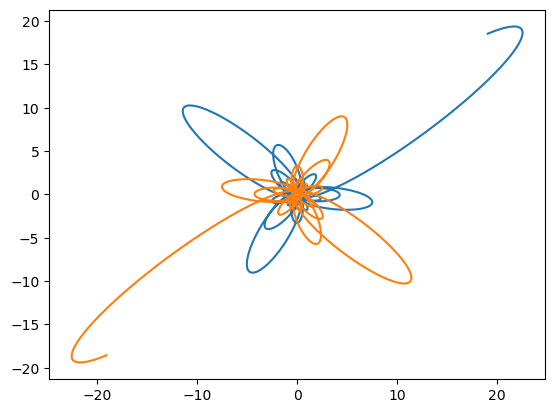

In [19]:
######## Plot for N-body using Euler Method #########
####### We can initialise the condition to check it for higher bodies ########

plot = euler(N,m,r,vel)[0]
for i in range(len(m)):
    plt.plot(plot[:,i,0],plot[:,i,1])
    

### Midpoint Scheme

In [24]:
def midpoint(N,m,r,v):
    x = np.zeros((N,len(m),3))
    v = np.zeros((N,len(m),3))
    xhalf = np.zeros((N,len(m),3))
    ahalf = np.zeros((N,len(m),3))
    for i in range(len(m)):
        x[0,i] = r[i]
        v[0,i] = vel[i]

    for i in range(1,N):
        k_1x = (h/2)*v[i-1]
        k1_v = (h/2)*acceleration(x[i-1],m)
        xhalf[i] = x[i-1]+k_1x
        ahalf[i] = acceleration(xhalf[i],m)
        k2_x =h*(v[i-1] + k1_v)
        k2_v =h*ahalf[i]


        x[i]=x[i-1]+ k2_x
        v[i]=v[i-1]+ k2_v

    return(x,v)


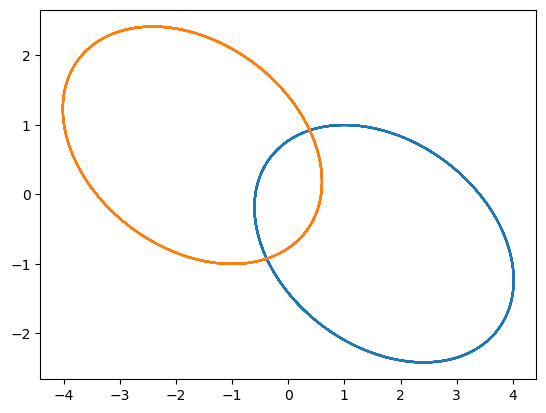

In [26]:
plmid = midpoint(N,m,r,vel)[0]
for i in range(len(m)):
    plt.plot(plmid[:,i,0],plmid[:,i,1])
plt.show()

## Leapfrog

In [27]:
def leapfrog(N,m,r,v):
    x = np.zeros((N,len(m),3))
    v = np.zeros((N,len(m),3))
    acc = np.zeros((N,len(m),3))


    for i in range(len(m)):
            x[0,i] = r[i]
            v[0,i] = vel[i]
    for i in range(1,N):
            x[i]=x[i-1]+h*v[i-1]+(h**2*0.5)*acceleration(x[i-1],m)
            acc[i] = acceleration(x[i],m)
            v[i]=  v[i-1] + 0.5*h*(acceleration(x[i-1],m)+acc[i])

    return(x,v)
# leapfrog(N,acceleration,m,r,vel)

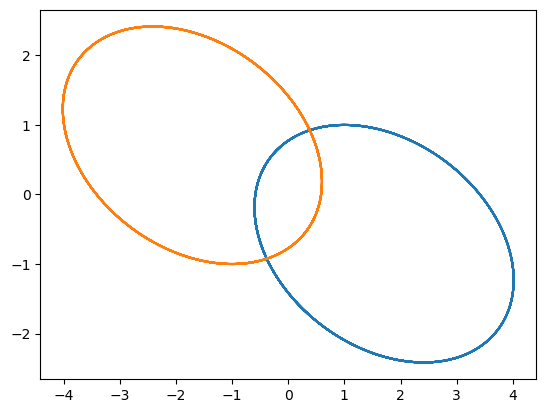

In [28]:
pleap = leapfrog(N,m,r,vel)[0]
for i in range(len(m)):
    plt.plot(pleap[:,i,0],pleap[:,i,1])
plt.show()

### Hermite Polynomial 

In [29]:
def hermite(N,m,r,v):

    x = np.zeros((N,len(m),3))
    v = np.zeros((N,len(m),3))
    xp = np.zeros((N,len(m),3))
    vp = np.zeros((N,len(m),3))
    ap = np.zeros((N,len(m),3))
    jp = np.zeros((N,len(m),3))
    for i in range(len(m)):
        x[0,i] = r[i]
       
        v[0,i] = vel[i]

    for i in range(1,N):

        xp[i] = x[i-1] + h*v[i-1]+ 0.5*h**2*acceleration(x[i-1],m) +(h**3/6)*(jerk(x[i-1],v[i-1],m)) #  + (h*0.5)*(v[i-1]+ v[i])  + ((h**2/12)*(acceleration(x[i-1],m) - acceleration(x[i],m)))
        
        vp[i]=v[i-1]+ h*acceleration(x[i-1],m) + 0.5*h**2*jerk(x[i-1],v[i-1],m)#+(h*0.5)*(acceleration(x[i-1],m)+ acceleration(x[i],m))+(h**2/12)*(jerk(x[i-1],v[i-1],m)-jerk(x[i],v[i],m))
        
        ap[i] = acceleration(xp[i],m)
        
        jp[i] =jerk(xp[i],vp[i],m)
        
        v[i]= v[i-1] + 0.5*h*(acceleration(x[i-1],m)+ap[i]) + (h**2/12)*(jerk(x[i-1],v[i-1],m) - jp[i])
        
        x[i] = x[i-1] + 0.5*h*(v[i-1]+vp[i]) + (h**2/12)*(acceleration(x[i-1],m) - ap[i])
        
    return(x,v)

# print(vel)
#print(x)    


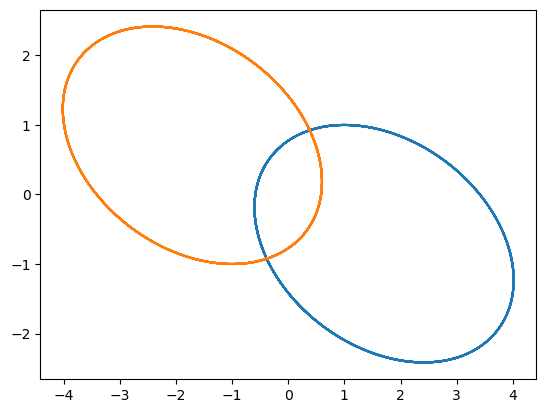

In [30]:
herm = hermite(N,m,r,vel)[0]
for i in range(len(m)):
    plt.plot(herm[:,i,0],herm[:,i,1])
plt.show()
hermv = hermite(N,m,r,vel)[1]

### Energy Loss

In [34]:
def energy(m1,m2,x_ij,v_ij):
    e = 0.5*((m1*m2)/(m1+m2))*v_ij**2 - ((G*m1*m2)/x_ij)
    return e



In [35]:
def plotfunc(m,func):
    m1 = m[0]
    m2 = m[1]

    xx = func(N,m,r,vel)[0]
    vv = func(N,m,r,vel)[1]

    v=vv[:,0] - vv[:,1]
    x=xx[:,0] - xx[:,1]

    e = np.zeros(len(x))
    err = np.zeros(len(x))
    e[0] = energy(m1,m2,np.linalg.norm(x[0]),np.linalg.norm(v[0]))

    for i in range(len(x)-1):
        x_ij =np.linalg.norm(x[i])
        v_ij = np.linalg.norm(v[i])
        e[i+1] = energy(m1,m2,x_ij,v_ij)                   #0.5*((m1*m2)/(m1+m2))*v_ij**2 - ((0.5*G*m1*m2)/x_ij)
        err[i+1] = (e[i+1]-e[i])/e[i]
    return (err)

errl = plotfunc(m,leapfrog)
errh = plotfunc(m,hermite)

try harder


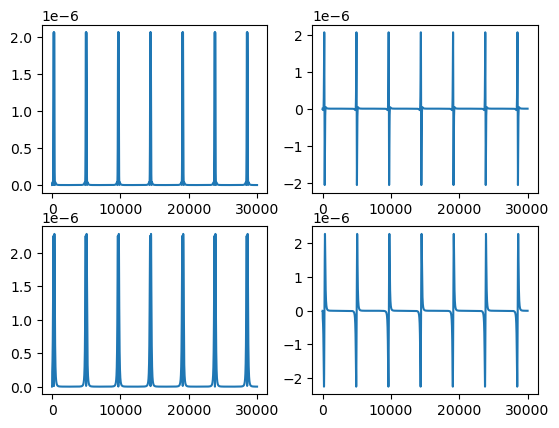

In [36]:
############# Plot of energy Loss ################
fig,ax = plt.subplots(2,2)
ax[0,0].plot(abs(errl))
ax[0,1].plot(errl)
ax[1,0].plot(abs(errh))
ax[1,1].plot(errh)
t2 =time.time()
if (t2-t1)> 120 :
    print("try harder")
else:
    print("came quick",(t2-t1))